In [1]:
import pandas as pd # panda use for matpulate data

In [2]:
#load dataset
data = pd.read_csv('C:/Users/DELL/Downloads/Galtons Height Data.csv')

In [3]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [4]:
#change inches to centimeters by multiply (2.54)
data['Father'] = 2.54*data['Father']
data['Mother'] = 2.54*data['Mother']
data['Height'] = 2.54*data['Height']

In [5]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.39,170.18,M,185.928,4
1,1,199.39,170.18,F,175.768,4
2,1,199.39,170.18,F,175.260,4
3,1,199.39,170.18,F,175.260,4
4,2,191.77,168.91,M,186.690,4


In [6]:
data.describe()

,Family,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,105.216036,175.851441,162.774401,169.572154,6.135857
std,57.189899,6.274450,5.859844,9.100613,2.685156
min,1.000000,157.480000,147.320000,142.240000,1.000000
25%,58.000000,172.720000,160.020000,162.560000,4.000000
50%,105.000000,175.260000,162.560000,168.910000,6.000000
75%,155.750000,180.340000,166.370000,177.038000,8.000000
max,205.000000,199.390000,179.070000,200.660000,15.000000


In [7]:
#Convert categorical variable into dummy
pd.get_dummies(['F','M'])

,F,M
0,1,0
1,0,1


In [8]:
gender = pd.get_dummies(data['Gender'],drop_first=True)

In [9]:
gender

,M
0,1
1,0
2,0
3,0
4,1
...,...
893,1
894,1
895,0
896,0


In [11]:
#drop Gender and family columns
data.drop(['Gender','Family'],axis=1,inplace=True)

In [12]:
data.head()

,Father,Mother,Height,Kids
0,199.39,170.18,185.928,4
1,199.39,170.18,175.768,4
2,199.39,170.18,175.260,4
3,199.39,170.18,175.260,4
4,191.77,168.91,186.690,4


In [13]:
#conta gender to the data
data = pd.concat([data,gender],axis=1)

In [14]:
data.head()

,Father,Mother,Height,Kids,M
0,199.39,170.18,185.928,4,1
1,199.39,170.18,175.768,4,0
2,199.39,170.18,175.260,4,0
3,199.39,170.18,175.260,4,0
4,191.77,168.91,186.690,4,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 5 columns):
Father    898 non-null float64
Mother    898 non-null float64
Height    898 non-null float64
Kids      898 non-null int64
M         898 non-null uint8
dtypes: float64(3), int64(1), uint8(1)
memory usage: 29.1 KB


In [17]:
#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Height',axis=1),
                                                data['Height'],test_size=0.30,
                                            random_state=101)

In [23]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      Father  Mother  Kids  M
268  179.070  165.10     5  0
681  172.720  149.86    10  1
655  173.228  161.29     5  0
452  175.260  168.91     6  0
2    199.390  170.18     4  0
..       ...     ...   ... ..
575  172.720  166.37     7  0
838  165.100  165.10     9  0
337  177.800  162.56     9  1
523  175.260  158.75     8  0
863  166.370  152.40     5  1

[628 rows x 4 columns]
      Father   Mother  Kids  M
493  175.260  160.020     6  1
237  177.800  175.260     6  1
194  180.340  160.020     9  1
218  180.340  158.750     5  0
388  177.800  154.940     2  1
..       ...      ...   ... ..
392  177.800  152.400     4  0
586  173.990  165.100     8  0
281  177.800  165.100     5  0
429  175.260  169.418     6  1
485  175.768  162.560     4  0

[270 rows x 4 columns]
268    154.94
681    162.56
655    163.83
452    160.02
2      175.26
        ...  
575    156.21
838    154.94
337    177.80
523    157.48
863    172.72
Name: Height, Length: 628, dtype: float64
493    177.800
237    17

In [24]:
#
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
prediction = lm.predict(x_test)

In [27]:
prediction

array([174.29187228, 180.69686899, 175.78110215, 163.4276542 ,
       174.18188795, 161.94227911, 177.6152657 , 176.92328114,
       172.94514379, 164.99435134, 157.41552738, 166.47674043,
       177.32233819, 181.87156503, 176.57150667, 162.97745977,
       158.97451494, 170.00691068, 161.97865096, 176.35219164,
       163.63692728, 168.84073606, 176.4769415 , 176.90080603,
       175.73685874, 166.13403407, 178.99836603, 163.04721747,
       171.71322825, 164.06178118, 157.41552738, 166.13403407,
       173.98504803, 182.31790467, 164.26214014, 177.97708211,
       177.78344336, 163.43150899, 176.25610406, 172.39267461,
       168.10548569, 180.11019835, 169.44287714, 166.75104762,
       163.94760632, 170.41600968, 163.94760632, 160.91008445,
       176.29806827, 177.78344336, 176.64897394, 160.91008445,
       177.29986308, 173.72849236, 173.73554831, 164.66825315,
       163.95565164, 177.6152657 , 178.61407452, 170.77646756,
       159.80129131, 174.36162997, 155.87130534, 170.00

In [28]:
import matplotlib.pylab as plt
%matplotlib inline

Text(0, 0.5, 'prediction Y')

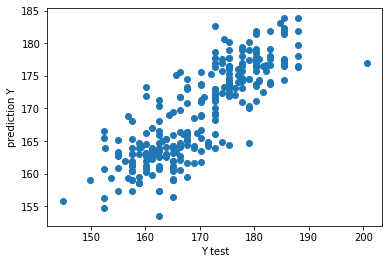

In [29]:
plt.scatter(y_test,prediction)
plt.xlabel('Y test')
plt.ylabel('prediction Y')

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))

MAE: 4.15325300723061


In [31]:
lm.predict([[179.0, 162.0, 1, 0]])

array([164.73889206])

In [32]:
lm.predict([[185.0, 170.0, 0, 1]])

array([182.7066749])

In [41]:
lm.predict([[185.0, 170.0, 1, 0]])

array([169.08309694])